# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/James/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("keys.env")
api_key = os.getenv("NEWS_API_KEY")
api_key = NEWS_API_KEY = "4da73172e35245d395e68e1e969949b3"

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin",
                                          language="en",
                                          sort_by="relevancy")

# Print total articles
print(f"Total Bitcoin articles: {btc_news['totalResults']}")

Total Bitcoin articles: 7044


In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum",
                                          language="en",
                                          sort_by="relevancy")
# Print total articles
print(f"Total articles: {eth_news['totalResults']}")

Total articles: 2945


In [6]:
# Create the Bitcoin sentiment scores DataFrame
def sentiments_df(article):
    sentiments = []
    for article in article['articles']:
        try:  
            text = article['content']
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "date": date,
                "Compound": compound,
                "Positive": pos,
                "Neutral": neu,
                "Negative": neg,
                "text" : text
                })
        except AttributeError:
            pass
    df = pd.DataFrame(sentiments)
    return df

btc_sentiment_df = sentiments_df(btc_news)
btc_sentiment_df.head()

date  Compound  Positive  Neutral  Negative  \
0  2021-08-06   -0.3400     0.000    0.939     0.061   
1  2021-08-23    0.4215     0.098    0.902     0.000   
2  2021-08-10    0.4019     0.080    0.920     0.000   
3  2021-08-19    0.6187     0.153    0.847     0.000   
4  2021-08-23    0.6908     0.161    0.839     0.000   

                                                text  
0  When my wife started a little garden in our ur...  
1  PayPal will now allow users outside the U.S. t...  
2  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...  
3  Retailers are increasingly accepting cryptocur...  
4  PayPal is bringing the ability to buy, hold an...

In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = sentiments_df(eth_news)
eth_sentiment_df.head()

date  Compound  Positive  Neutral  Negative  \
0  2021-07-29   -0.2411     0.000    0.939     0.061   
1  2021-08-05    0.6956     0.190    0.810     0.000   
2  2021-08-23    0.4215     0.098    0.902     0.000   
3  2021-08-10    0.5719     0.139    0.861     0.000   
4  2021-08-23    0.6908     0.161    0.839     0.000   

                                                text  
0  Blockchain infrastructure startups are heating...  
1  Cent was founded in 2017 as an ad-free creator...  
2  PayPal will now allow users outside the U.S. t...  
3  After the bell today, Coinbase reported anothe...  
4  PayPal is bringing the ability to buy, hold an...

In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

Compound   Positive    Neutral  Negative
count  20.000000  20.000000  20.000000  20.00000
mean    0.233065   0.078600   0.894150   0.02725
std     0.445396   0.066396   0.071971   0.06766
min    -0.886000   0.000000   0.729000   0.00000
25%     0.000000   0.000000   0.846000   0.00000
50%     0.411700   0.091500   0.903000   0.00000
75%     0.583600   0.130000   0.924750   0.00000
max     0.718400   0.200000   1.000000   0.27100

In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

Compound   Positive    Neutral   Negative
count  20.000000  20.000000  20.000000  20.000000
mean    0.111575   0.050850   0.931650   0.017450
std     0.332138   0.061903   0.059209   0.032233
min    -0.440400   0.000000   0.810000   0.000000
25%    -0.025675   0.000000   0.900250   0.000000
50%     0.000000   0.024000   0.933500   0.000000
75%     0.323650   0.095000   1.000000   0.010750
max     0.695600   0.190000   1.000000   0.094000

### Questions:

**Which coin had the highest mean positive score?**
>  BTC: 0.0786 <br>
ETH: 0.04705 <br>
.:. BTC has the higher mean positive score

**Which coin had the highest compound score?**
>  BTC: 0.7184 <br>
ETH: 0.6956 <br>
.:. BTC has the higher mean positive score

**Which coin had the highest positive score?**
>  BTC: 0.2 <br>
ETH: 0.19 <br>
.:. BTC has the higher mean positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to /Users/James/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    regex_output = regex.sub('', text)
   
    # Create a tokenized list of the words
    tokenized_words = word_tokenize(regex_output)
    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in tokenized_words]
   
    # Convert the words to lowercase
    lowercase = [word.lower() for word in root_words]
    
    # Remove the stop words
    tokens = [word for word in lowercase if not word in stop_words]
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['text'].apply(tokenizer)
btc_sentiment_df.head()

date  Compound  Positive  Neutral  Negative  \
0  2021-08-06   -0.3400     0.000    0.939     0.061   
1  2021-08-23    0.4215     0.098    0.902     0.000   
2  2021-08-10    0.4019     0.080    0.920     0.000   
3  2021-08-19    0.6187     0.153    0.847     0.000   
4  2021-08-23    0.6908     0.161    0.839     0.000   

                                                text  \
0  When my wife started a little garden in our ur...   
1  PayPal will now allow users outside the U.S. t...   
2  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...   
3  Retailers are increasingly accepting cryptocur...   
4  PayPal is bringing the ability to buy, hold an...   

                                              tokens  
0  [wife, started, little, garden, urban, backyar...  
1  [paypal, allow, user, outside, us, buy, hold, ...  
2  [photo, joe, raedlegetty, images, twitter, squ...  
3  [retailers, increasingly, accepting, cryptocur...  
4  [paypal, bringing, ability, buy, hold, sell, c...

In [14]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['text'].apply(tokenizer)
eth_sentiment_df.head()

date  Compound  Positive  Neutral  Negative  \
0  2021-07-29   -0.2411     0.000    0.939     0.061   
1  2021-08-05    0.6956     0.190    0.810     0.000   
2  2021-08-23    0.4215     0.098    0.902     0.000   
3  2021-08-10    0.5719     0.139    0.861     0.000   
4  2021-08-23    0.6908     0.161    0.839     0.000   

                                                text  \
0  Blockchain infrastructure startups are heating...   
1  Cent was founded in 2017 as an ad-free creator...   
2  PayPal will now allow users outside the U.S. t...   
3  After the bell today, Coinbase reported anothe...   
4  PayPal is bringing the ability to buy, hold an...   

                                              tokens  
0  [blockchain, infrastructure, startup, heating,...  
1  [cent, wa, founded, 2017, adfree, creator, net...  
2  [paypal, allow, user, outside, us, buy, hold, ...  
3  [bell, today, coinbase, reported, another, per...  
4  [paypal, bringing, ability, buy, hold, sell, c...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = tokenizer(str(btc_sentiment_df['tokens']))
btc_ngrams = ngrams(btc_tokens, n=2)

In [17]:
# Generate the Ethereum N-grams where N=2
eth_tokens = tokenizer(str(eth_sentiment_df['tokens']))
eth_ngrams = ngrams(eth_tokens, n=2)

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_ngrams)

[(('buy', 'hold'), 3),
 (('paypal', 'allow'), 2),
 (('allow', 'user'), 2),
 (('hold', 'sell'), 2),
 (('representation', 'cryptocurrency'), 2),
 (('cryptocurrency', 'bitcoin'), 2),
 (('20218', 'min'), 2),
 (('0', 'wife'), 1),
 (('wife', 'started'), 1),
 (('started', 'little'), 1)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_ngrams)

[(('buy', 'hold'), 2),
 (('0', 'blockchain'), 1),
 (('blockchain', 'infrastructure'), 1),
 (('infrastructure', 'startup'), 1),
 (('startup', 'heating1'), 1),
 (('heating1', 'cent'), 1),
 (('cent', 'wa'), 1),
 (('wa', 'founded'), 1),
 (('founded', '2017'), 1),
 (('2017', 'adfree'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

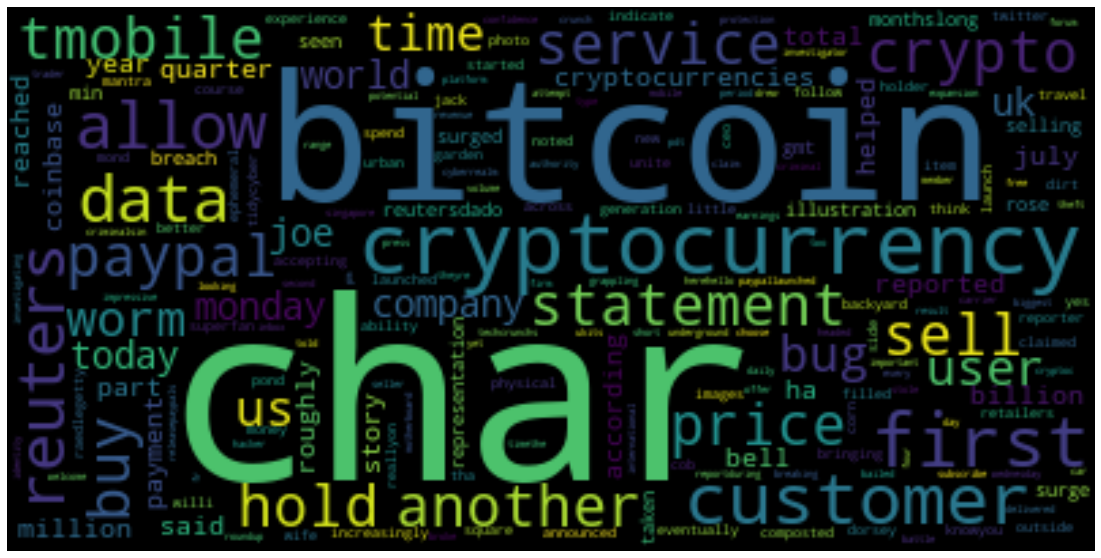

In [22]:
# Generate the Bitcoin word cloud
def token_list(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens
btc_tokens = token_list(btc_sentiment_df)
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# Generate the Ethereum word cloud
eth_tokens = token_list(eth_sentiment_df)
wc = WordCloud(collocations=False).generate(' '.join(eth_tokens))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_sentiment_df['text'])

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [30]:
# List all Entities
for ent in btc_doc.ents:
    print(ent, ent.label_)

U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Joe Raedle PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
a year DATE
US GPE
Joe TidyCyber PERSON
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
two years DATE
roughly 49 million CARDINAL
UK GPE
first ORDINAL
four CARDINAL
SINGAPORE GPE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Motherboard PERSON
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug PERSON
20 CARDINAL
Reuters ORG
5.01 % PERCENT
49,106.4 MONEY
22:04 GMT TIME
Friday DATE
August DATE
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost ORG
Bitcoin, Dogecoin ORG
Ethereum GPE
T-Mobile ORG
Roughly 47.8 million CARDINAL
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
REUTERS ORG
Dado 

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_sentiment_df['text'])

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [34]:
# List all Entities
for ent in eth_doc.ents:
    print(ent, ent.label_)

2017 DATE
Reddit NORP
Ethereum PERSON
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
a year DATE
US GPE
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
One CARDINAL
Monday DATE
Poly Network ORG
White PERSON
Monday DATE
Amazon ORG
Amazon ORG
Vitalik Buterin PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buterin PERSON
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
Justin Sullivan PERSON
Getty Images
Citigroup ORG
CoinDesk PRODUCT
two CARDINAL
one CARDINAL
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
More than $144 million MONEY
August 5 DATE
Sunday DATE
over 45,799 CARD

---